In [1]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


# 1- Importing and viewing the data

In [2]:
import pandas as pd 
df = pd.read_csv("input/adult.csv", skipinitialspace=True, na_values="?")

df.head(10)

,age,workclass,fnlwgt,educatoin,educatoin_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
# get information on abut the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   educatoin       32561 non-null  object
 4   educatoin_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# 2- Change all the objects to categorial type

In [4]:
# Change all the objects to categorial type
for col in ['workclass', 'educatoin', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']:
    df[col] = df[col].astype('category')
    
df.dtypes

age                  int64
workclass         category
fnlwgt               int64
educatoin         category
educatoin_num        int64
marital_status    category
occupation        category
relationship      category
race              category
sex               category
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country    category
income            category
dtype: object

# 3- removing nulls 

In [5]:
# count the number of missing values for each column
num_missing = (df[['age','fnlwgt','educatoin_num','capital_gain','hours_per_week']] == 0).sum()
# report the results
print(num_missing)

age                   0
fnlwgt                0
educatoin_num         0
capital_gain      29849
hours_per_week        0
dtype: int64


In [6]:
# count the number of missing values for each column
df['workclass'].isnull().sum()

1836

In [7]:
# count the number of missing values for each column
df['occupation'].isnull().sum()

1843

In [8]:
# count the number of missing values for each column
df['native_country'].isnull().sum()

583

In [9]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
educatoin            0
educatoin_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [10]:
df.count()

age               32561
workclass         30725
fnlwgt            32561
educatoin         32561
educatoin_num     32561
marital_status    32561
occupation        30718
relationship      32561
race              32561
sex               32561
capital_gain      32561
capital_loss      32561
hours_per_week    32561
native_country    31978
income            32561
dtype: int64

In [11]:
# drop all the rows having NaN
df = df.dropna()
df.head(10)

,age,workclass,fnlwgt,educatoin,educatoin_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [12]:
# number of rows after removing the NaN
df.count()

age               30162
workclass         30162
fnlwgt            30162
educatoin         30162
educatoin_num     30162
marital_status    30162
occupation        30162
relationship      30162
race              30162
sex               30162
capital_gain      30162
capital_loss      30162
hours_per_week    30162
native_country    30162
income            30162
dtype: int64

# reset the index in the panda:

In [13]:
# reset the index in the panda:
df = df.reset_index(drop=True)

In [14]:
# count the number of missing values for each column
num_missing = (df[['age','fnlwgt','educatoin_num','capital_gain','hours_per_week']] == 0).sum()
# report the results
print(num_missing)

age                   0
fnlwgt                0
educatoin_num         0
capital_gain      27624
hours_per_week        0
dtype: int64


In [15]:
# count the number of missing values for each column
num_missing = (df[['age','fnlwgt','educatoin_num','capital_gain','hours_per_week']] == 0).sum()
# report the results
print(num_missing)

age                   0
fnlwgt                0
educatoin_num         0
capital_gain      27624
hours_per_week        0
dtype: int64


# 4 - Label Encoding

In [16]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()


# Converting string labels into numbers.

# workclass
df[['workclass']]=le.fit_transform(df[['workclass']])
print("workclass_encoded",df[['workclass']])

# marital_status
df[['marital_status']]=le.fit_transform(df[['marital_status']])
print("marital_status_encoded",df[['marital_status']])

# occupation
df[['occupation']]=le.fit_transform(df[['occupation']])
print("occupation_encoded",df[['occupation']])

# race
df[['race']] =le.fit_transform(df[['race']])
print("race_encoded", df[['race']])

# Sex
df[['sex']]=le.fit_transform(df[['sex']])
print("sex_encoded",df[['sex']])

# native_country
df[['native_country']]=le.fit_transform(df[['native_country']])
print("native_country_encoded",df[['native_country']])

# income
df[['income']]=le.fit_transform(df[['income']])
print("income_encoded",df[['income']])

workclass_encoded        workclass
0              5
1              4
2              2
3              2
4              2
...          ...
30157          2
30158          2
30159          2
30160          2
30161          3

[30162 rows x 1 columns]
marital_status_encoded        marital_status
0                   4
1                   2
2                   0
3                   2
4                   2
...               ...
30157               2
30158               2
30159               6
30160               4
30161               2

[30162 rows x 1 columns]
occupation_encoded        occupation
0               0
1               3
2               5
3               5
4               9
...           ...
30157          12
30158           6
30159           0
30160           0
30161           3

[30162 rows x 1 columns]
race_encoded        race
0         4
1         4
2         4
3         2
4         2
...     ...
30157     4
30158     4
30159     4
30160     4
30161     4

[30162 rows x 1 colu

C:\Users\new\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\new\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\new\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\new\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# 5- Selecting Features

# Experment 1 with 5 features age,workclass,educatoin_num,occupation,race

In [17]:
# features=df[['age','workclass','educatoin_num','marital_status','occupation','race','sex','capital_gain','hours_per_week','native_country']]
features=df[['age','workclass','educatoin_num','occupation','race']]
features

,age,workclass,educatoin_num,occupation,race
0,39,5,13,0,4
1,50,4,13,3,4
2,38,2,9,5,4
3,53,2,7,5,2
4,28,2,13,9,2
...,...,...,...,...,...
30157,27,2,12,12,4
30158,40,2,9,6,4
30159,58,2,9,0,4
30160,22,2,9,0,4


# Lable (Class)

In [18]:
label = df[['income']]
label

,income
0,0
1,0
2,0
3,0
4,0
...,...
30157,0
30158,1
30159,0
30160,0


# 6- Split the data to Training Testing 

In [19]:
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.30)

In [20]:
features_test.count()

age              9049
workclass        9049
educatoin_num    9049
occupation       9049
race             9049
dtype: int64

# 7 -  Trainig the model

# A) Training before scaling

# We will use the default distance metric to use for the tree.
# The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,weights='uniform')
classifier.fit(features_train,label_train.values.ravel())

KNeighborsClassifier()

In [22]:
label_pred = classifier.predict(features_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(label_test, label_pred))
print(classification_report(label_test, label_pred))

[[6034  788]
 [1272  955]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      6822
           1       0.55      0.43      0.48      2227

    accuracy                           0.77      9049
   macro avg       0.69      0.66      0.67      9049
weighted avg       0.76      0.77      0.76      9049



#  B) Scalling

# Training with scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features_train)

features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

#  Starting with K= 5

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform' )
classifier.fit(features_train,label_train.values.ravel())

KNeighborsClassifier()

In [26]:
label_pred = classifier.predict(features_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(label_test, label_pred))
print(classification_report(label_test, label_pred))

[[6025  797]
 [1242  985]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      6822
           1       0.55      0.44      0.49      2227

    accuracy                           0.77      9049
   macro avg       0.69      0.66      0.67      9049
weighted avg       0.76      0.77      0.77      9049



# Comparing Error Rate with the K Value

In [28]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(features_train, label_train.values.ravel())
    pred_i = knn.predict(features_test)
    pred_i=pred_i.reshape(9049  ,1)
    error.append(np.mean(pred_i != label_test))

Text(0, 0.5, 'Mean Error')

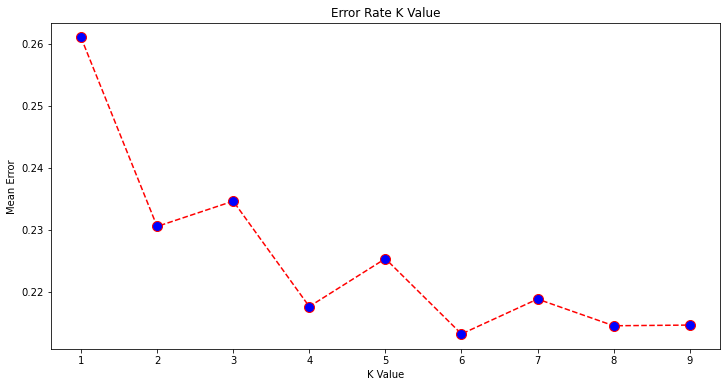

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Using K = 9

In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9,weights='uniform')
classifier.fit(features_train,label_train.values.ravel())

KNeighborsClassifier(n_neighbors=9)

In [31]:
label_pred = classifier.predict(features_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(label_test, label_pred))
print(classification_report(label_test, label_pred))

[[6143  679]
 [1263  964]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      6822
           1       0.59      0.43      0.50      2227

    accuracy                           0.79      9049
   macro avg       0.71      0.67      0.68      9049
weighted avg       0.77      0.79      0.77      9049



# Comparing between K = 5 and k= 9

![](K_5_to_k_7_3.jpg)

![](confusion_metrix_3.jpg)

In [33]:
# precision = TP/(TP+FP) from form 54% to 61% for class 1
# Recall= TP/(TP+FN)  from 0.89 to 93 for class 0 
# F1 which is a function of Precision and Recall 
# -->  A better measure to use for a balance between Precision and Recall
# Micro-average of precision = (TP1+TP2)/(TP1+TP2+FP1+FP2)  68% to 78%
# Micro-average of recall = (TP1+TP2)/(TP1+TP2+FN1+FN2)     67% 64%
# Waited Avarage  

# Increating the training set to 80% 

In [34]:
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.20)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7,weights='uniform')
classifier.fit(features_train,label_train.values.ravel())

KNeighborsClassifier(n_neighbors=7)

In [36]:
label_pred = classifier.predict(features_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(label_test, label_pred))
print(classification_report(label_test, label_pred))

[[4017  506]
 [ 840  670]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4523
           1       0.57      0.44      0.50      1510

    accuracy                           0.78      6033
   macro avg       0.70      0.67      0.68      6033
weighted avg       0.76      0.78      0.77      6033



![](Traing_70_to_Training_80_3.jpg)

# Increasing the training dataset and reducing the test didnt increase acuracy much , KNN is a lazy model  that runs the the trainig when providing the test data

# Decreasing the training set to 60% and the test set to 40% 

In [38]:
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.40)


from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7,weights='uniform')
classifier.fit(features_train,label_train.values.ravel())

label_pred = classifier.predict(features_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(label_test, label_pred))
print(classification_report(label_test, label_pred))

[[8162  963]
 [1675 1265]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      9125
           1       0.57      0.43      0.49      2940

    accuracy                           0.78     12065
   macro avg       0.70      0.66      0.68     12065
weighted avg       0.77      0.78      0.77     12065



![](k_7_Data_set_to_60.jpg)

# Decreasing the training set to 60% and the test set to 40% enhanced the accuracy by 1%

# Using all features 10 

In [39]:
features=df[['age','workclass','educatoin_num','marital_status','occupation','race','sex','capital_gain','hours_per_week','native_country']]
features

,age,workclass,educatoin_num,marital_status,occupation,race,sex,capital_gain,hours_per_week,native_country
0,39,5,13,4,0,4,1,2174,40,38
1,50,4,13,2,3,4,1,0,13,38
2,38,2,9,0,5,4,1,0,40,38
3,53,2,7,2,5,2,1,0,40,38
4,28,2,13,2,9,2,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...
30157,27,2,12,2,12,4,0,0,38,38
30158,40,2,9,2,6,4,1,0,40,38
30159,58,2,9,6,0,4,0,0,40,38
30160,22,2,9,4,0,4,1,0,20,38


In [40]:
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.40,random_state=10)


from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7,weights='uniform')
classifier.fit(features_train,label_train.values.ravel())

label_pred = classifier.predict(features_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(label_test, label_pred))
print(classification_report(label_test, label_pred))

[[8134  884]
 [1234 1813]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      9018
           1       0.67      0.60      0.63      3047

    accuracy                           0.82     12065
   macro avg       0.77      0.75      0.76     12065
weighted avg       0.82      0.82      0.82     12065



![](k_7_60_training_10_features.jpg)

# Learning Cureve and validation curve

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

In [42]:
def show_curve(train_scores, test_scores, x_axis_range, title, xlabel):
  train_scores_mean= np.mean(train_scores, axis=1)
  train_scores_std= np.std(train_scores, axis=1)
  test_scores_mean= np.mean(test_scores, axis=1)
  test_scores_std= np.std(test_scores, axis=1)  
  
  plt.figure()
  plt.plot(x_axis_range, train_scores_mean, marker='o', label= "Training score")
  plt.plot(x_axis_range, test_scores_mean, marker='o', label="Cross-Validation score")
 
  plt.fill_between(x_axis_range, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std,color= '#33F4FF',alpha=0.5)
  plt.fill_between(x_axis_range, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, color= '#DDDDDD',alpha=0.5)
 
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel('Score')
  plt.legend(loc= 'best')

In [43]:
from sklearn.model_selection import learning_curve
train_sizes= np.linspace(0.01,0.85,10,20)
scoring= "accuracy"
# train_sizes= np.linspace(0.01,0.85,10,20)
from sklearn.model_selection import validation_curve
param_name= 'n_neighbors'
param_range = np.linspace(1,12,12)

In [44]:
score= classifier.score(features_test, label_test)
print("Test score: ", score)

Test score:  0.8244508910070452


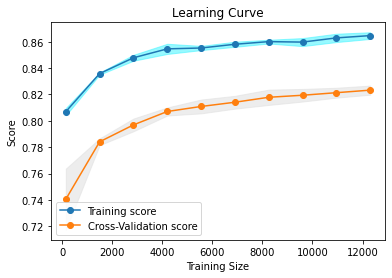

In [45]:
train_sizes, train_scores, test_scores= learning_curve(classifier, features_train, label_train.values.ravel(), scoring=scoring, train_sizes= train_sizes)
show_curve(train_scores, test_scores, train_sizes, 'Learning Curve', 'Training Size') 


In [46]:
# Conclusion --> KNN is a lazy model that dosent learn form the traing set , it is not effecte

# Adetional Checkes

In [47]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 70):
    knn = KNeighborsClassifier(n_neighbors=i,weights='uniform')
    knn.fit(features_train, label_train.values.ravel())
    pred_i = knn.predict(features_test)
    pred_i=pred_i.reshape(12065,1)
    error.append(np.mean(pred_i != label_test))

Text(0, 0.5, 'Mean Error')

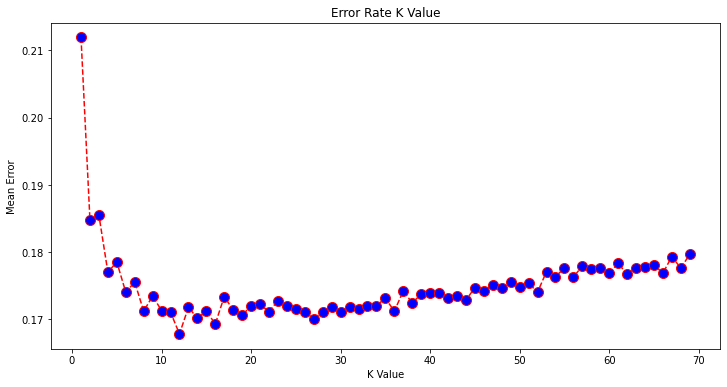

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 70), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [49]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i,weights='uniform')
    knn.fit(features_train, label_train.values.ravel())
    pred_i = knn.predict(features_test)
    pred_i=pred_i.reshape(12065,1)
    error.append(np.mean(pred_i != label_test))

Text(0, 0.5, 'Mean Error')

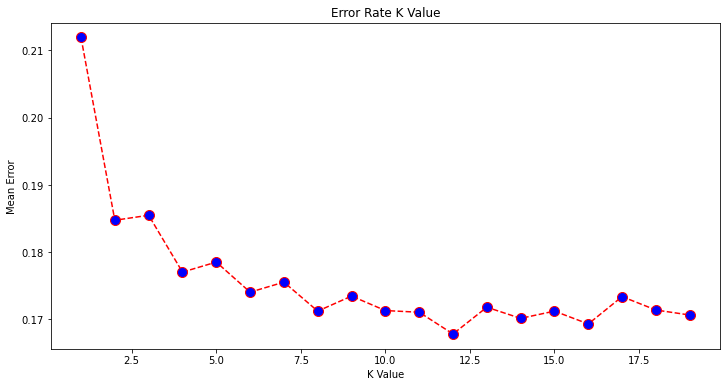

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [51]:
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.40)


from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=20,weights='uniform'
                                 )
classifier.fit(features_train,label_train.values.ravel())

label_pred = classifier.predict(features_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(label_test, label_pred))
print(classification_report(label_test, label_pred))

[[8409  627]
 [1416 1613]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      9036
           1       0.72      0.53      0.61      3029

    accuracy                           0.83     12065
   macro avg       0.79      0.73      0.75     12065
weighted avg       0.82      0.83      0.82     12065



![](k_7_17_18_19_20.jpg)

# Changes to k value form 7 to,17 enhanced the acuracy by 1%

# No major accuracy changes for k between 7 and 20

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

In [53]:
firstModel = KNeighborsClassifier(n_neighbors=5,weights='uniform')
firstModel.fit(features_train,label_train.values.ravel())
# firstModel = SVC(kernel='rbf', C = 1, gamma = 0.0001)
# firstModel.fit(features_train, label_train)

print('first mdel with k=5')
print(classification_report(label_test, firstModel.predict(featuers_test), target_names=['Income more than 50K', 'Income less than 50K']))
print() 

firstModel = KNeighborsClassifier(n_neighbors=9,weights='uniform')
firstModel.fit(features_train,label_train.values.ravel())

print('first mdel with k=9')
print(classification_report(label_test, firstModel.predict(featuers_test), target_names=['Income more than 50K', 'Income less than 50K']))
print()

first mdel with k=5


NameError: name 'featuers_test' is not defined

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes= np.linspace(0.01,1,10)
scoring= "accuracy"

from sklearn.model_selection import validation_curve
param_name= 'max_depth'
param_range = np.linspace(1,12,12)

In [ ]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()

In [ ]:
def show_curve(train_scores, test_scores, x_axis_range, title, xlabel):
  train_scores_mean= np.mean(train_scores, axis=1)
  train_scores_std= np.std(train_scores, axis=1)
  test_scores_mean= np.mean(test_scores, axis=1)
  test_scores_std= np.std(test_scores, axis=1)  
  
  plt.figure()
  plt.plot(x_axis_range, train_scores_mean, marker='o', label= "Training score")
  plt.plot(x_axis_range, test_scores_mean, marker='o', label="Cross-Validation score")

  plt.fill_between(x_axis_range, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std,color= '#33F4FF',alpha=0.5)
  plt.fill_between(x_axis_range, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, color= '#DDDDDD',alpha=0.5)

  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel('Score')
  plt.legend(loc= 'best')

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes= np.linspace(0.01,1,10)
scoring= "accuracy"

from sklearn.model_selection import validation_curve
param_name= 'max_depth'
param_range = np.linspace(1,12,12)

In [ ]:
score= best_clf.score(X_test, y_test)
print("Test score: ", score)

In [ ]:
train_sizes, train_scores, test_scores= learning_curve(best_clf, X_train, y_train, scoring=scoring, train_sizes= train_sizes)
show_curve(train_scores, test_scores, train_sizes, 'Learning Curve', 'Training Size')
